# TASK 5: CREDIT CARD FRAUD DETECTION

## Introduction

The Credit Card Fraud Detection task involves developing a machine learning model to identify fraudulent credit card transactions. The goal is to preprocess and normalize the transaction data, address class imbalance issues, split the dataset into training and testing sets, and train classification algorithms to accurately classify transactions as fraudulent or genuine. Evaluation metrics like precision, recall, and F1-score will be used to assess model performance, and techniques such as oversampling or undersampling will be considered to improve results.

In this context, the Scikit-learn and imbalanced-learn libraries are used for data preprocessing, model training, and evaluation.

## Libraries Required

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

## Data Loading

In [19]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

## Data Analysis

In [20]:
# Display the first few entries in the dataset
data.head()

# Display information about the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Basic statistics of the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
# Check for missing values
print(data.isnull().sum())

# Display the distribution of classes
print(data['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


## Data Exploration

Class
0    284315
1       492
Name: count, dtype: int64


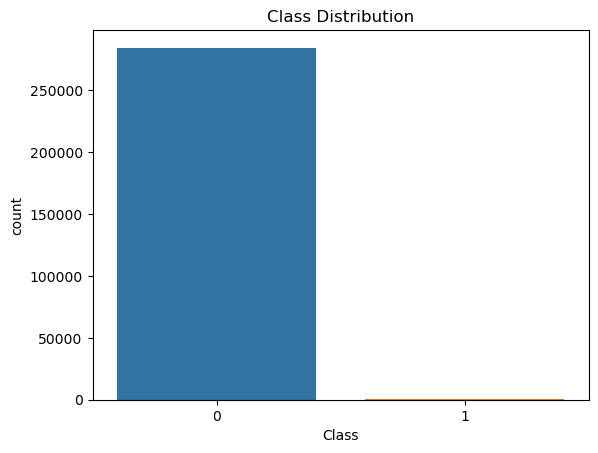

In [22]:
# Exploring the distribution of classes
print(data['Class'].value_counts())

# Visualizing the class distribution
sb.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


## Data Preprocessing

In [23]:
# Normalize the 'Time' and 'Amount' features
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Separate features and target
x = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


## Data Visualization

### Correlation Heatmap

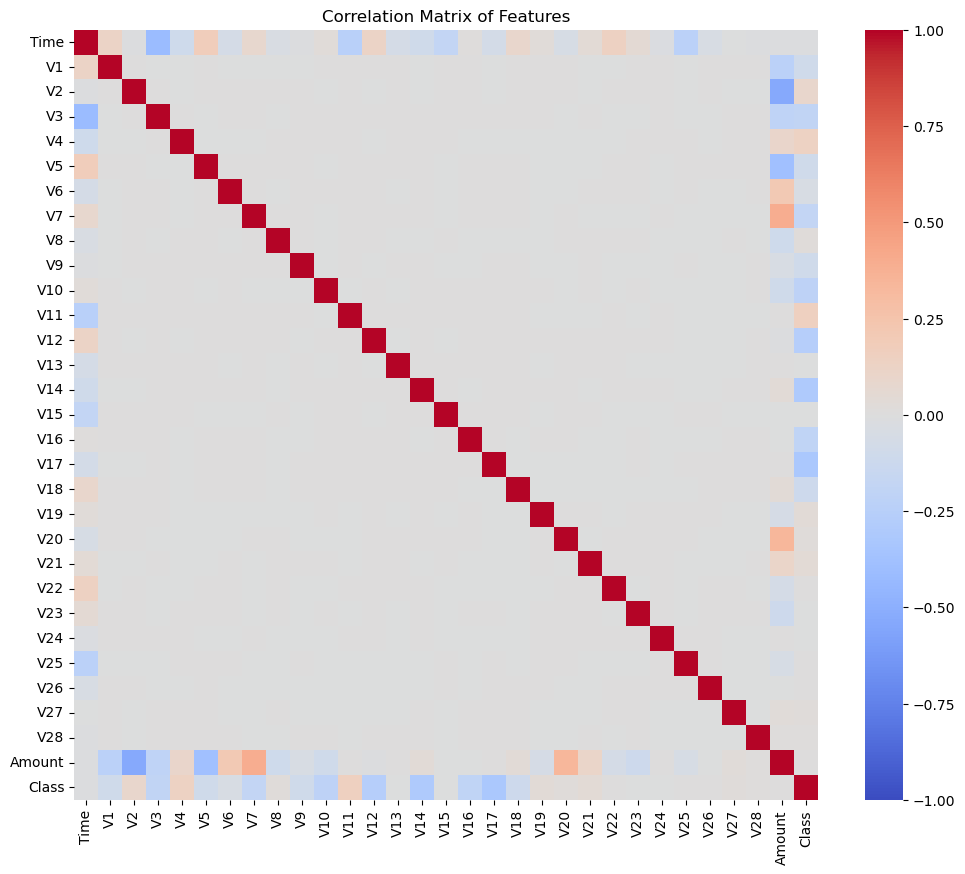

In [24]:
plt.figure(figsize=(12, 10))
sb.heatmap(data.corr(), cmap="coolwarm", annot=False, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

### Pair Plot of Selected Features

C:\Users\AAYUSHI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


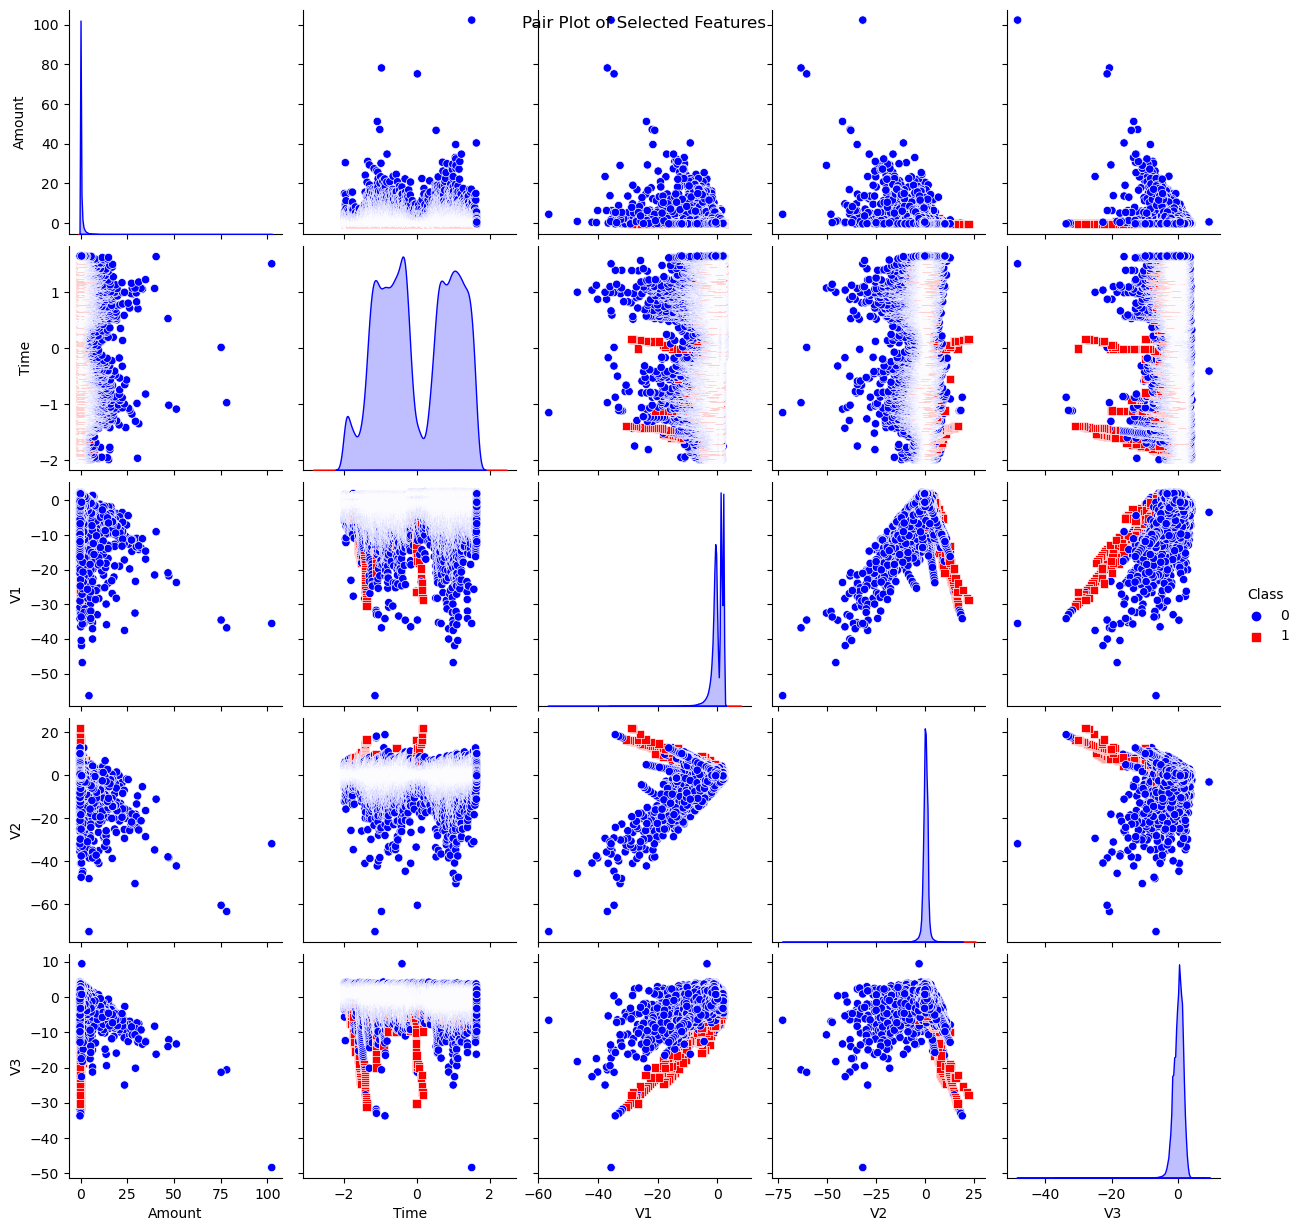

In [25]:
# Selecting a subset of features for pair plot
subset_features = ['Amount', 'Time', 'V1', 'V2', 'V3', 'Class']
subset_data = data[subset_features]

# Pair plot for selected features
sb.pairplot(subset_data, hue='Class', markers=['o', 's'], palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot of Selected Features')
plt.show()

### ROC Curve

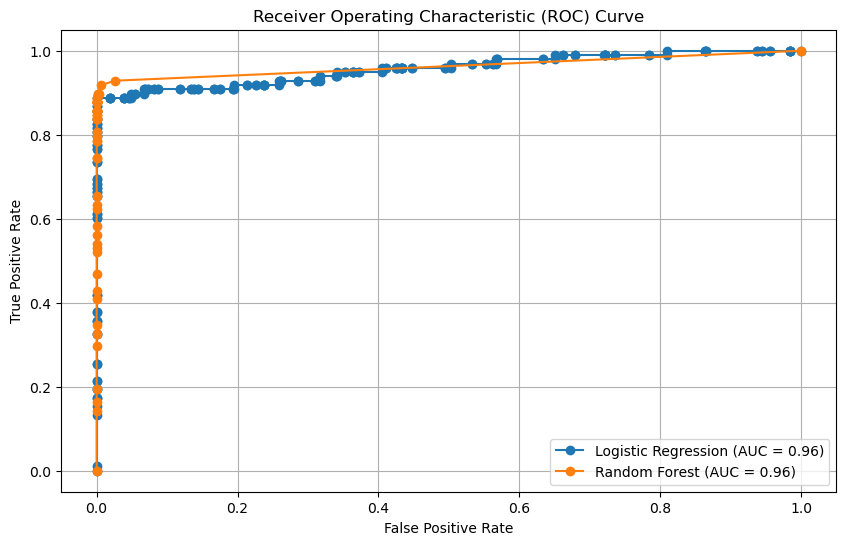

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming `lr` is your Logistic Regression model and `rf` is your Random Forest model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

# Get predicted probabilities for the positive class (fraudulent transactions)
lr_probs = lr.predict_proba(x_test)[:, 1]  # Logistic Regression probabilities
rf_probs = rf.predict_proba(x_test)[:, 1]  # Random Forest probabilities

# Get the ROC curve values
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Calculate AUC
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, marker='o', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='o', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


### Histogram

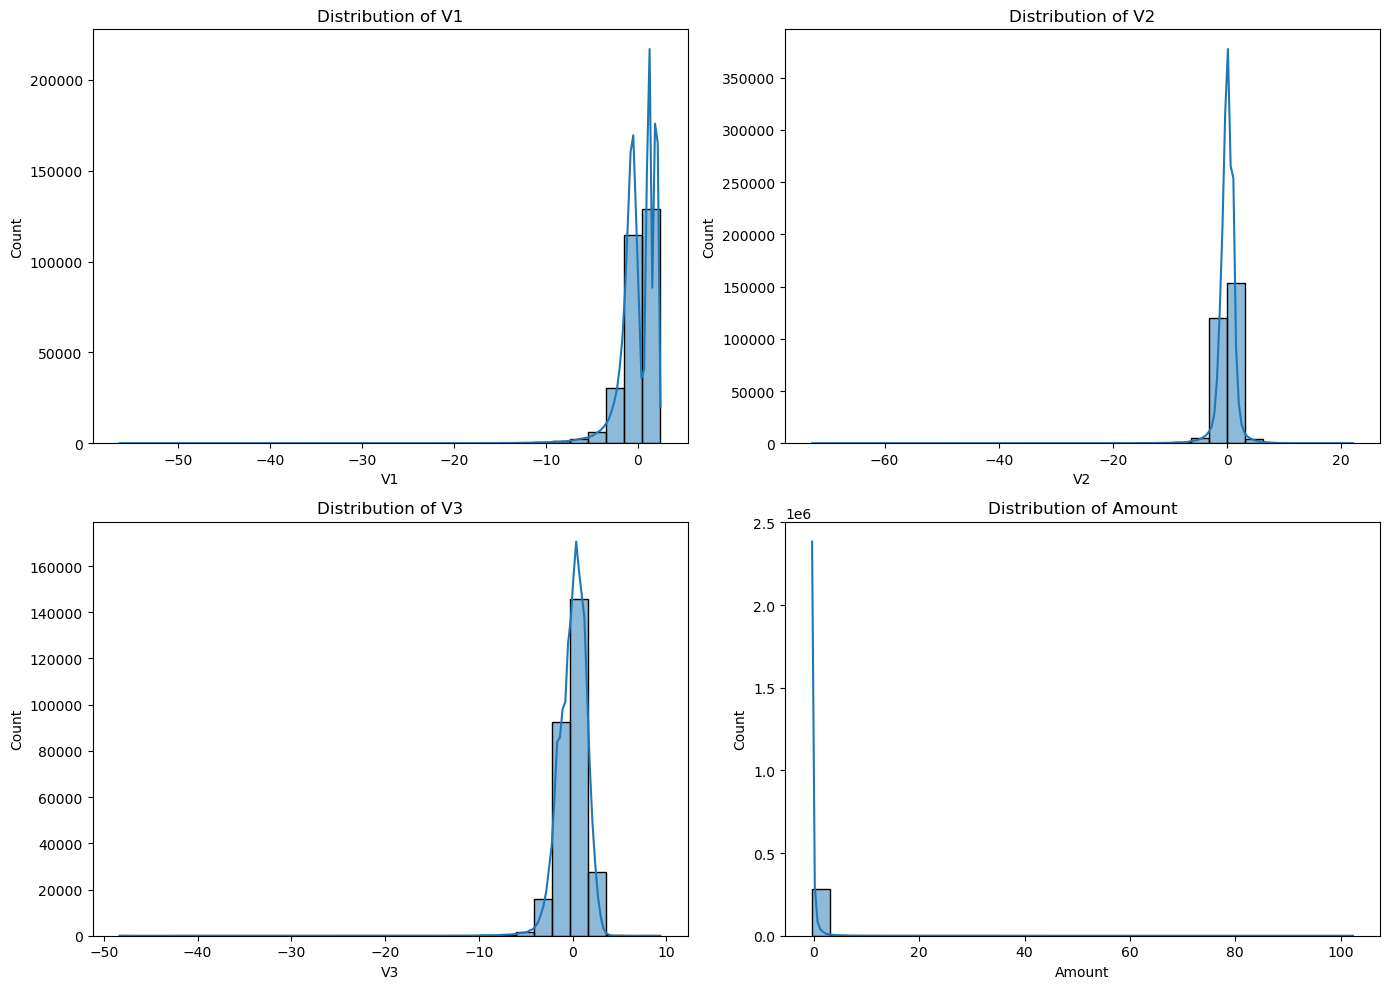

In [27]:
import seaborn as sns# Histograms for a few selected features
features = ['V1', 'V2', 'V3', 'Amount']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Model Training and Evaluation

### Logistic Regression

In [28]:
# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(x_train, y_train)

# Make predictions
lr_pred = lr.predict(x_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_class_report = classification_report(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", lr_class_report)


Logistic Regression Accuracy: 0.9991573329588147
Confusion Matrix:
 [[56851    13]
 [   35    63]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### Random Forest Classifier

In [29]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions
rf_pred = rf.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)


Random Forest Accuracy: 0.9995962220427653
Confusion Matrix:
 [[56859     5]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Testing and Prediction

In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.random.rand(100, 30))

print("Welcome to the Credit Card Fraud Detection Input!")

# Get user input for transaction details
time = float(input("Enter Transaction Time (seconds after the first transaction in the dataset): "))
v1 = float(input("Enter V1 feature: "))
v2 = float(input("Enter V2 feature: "))
v3 = float(input("Enter V3 feature: "))
v4 = float(input("Enter V4 feature: "))
v5 = float(input("Enter V5 feature: "))
v6 = float(input("Enter V6 feature: "))
v7 = float(input("Enter V7 feature: "))
v8 = float(input("Enter V8 feature: "))
v9 = float(input("Enter V9 feature: "))
v10 = float(input("Enter V10 feature: "))
v11 = float(input("Enter V11 feature: "))
v12 = float(input("Enter V12 feature: "))
v13 = float(input("Enter V13 feature: "))
v14 = float(input("Enter V14 feature: "))
v15 = float(input("Enter V15 feature: "))
v16 = float(input("Enter V16 feature: "))
v17 = float(input("Enter V17 feature: "))
v18 = float(input("Enter V18 feature: "))
v19 = float(input("Enter V19 feature: "))
v20 = float(input("Enter V20 feature: "))
v21 = float(input("Enter V21 feature: "))
v22 = float(input("Enter V22 feature: "))
v23 = float(input("Enter V23 feature: "))
v24 = float(input("Enter V24 feature: "))
v25 = float(input("Enter V25 feature: "))
v26 = float(input("Enter V26 feature: "))
v27 = float(input("Enter V27 feature: "))
v28 = float(input("Enter V28 feature: "))
amount = float(input("Enter Transaction Amount: "))

# Create a numpy array with the input data for prediction
input_data = np.array([[time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount]])

# Standardize the input data using the scaler used in training
input_data = scaler.transform(input_data)

# Predicting with Logistic Regression model
lr_prediction = lr.predict(input_data)

# Predicting with Random Forest model
rf_prediction = rf.predict(input_data)

# Display predictions
print("\nLogistic Regression Prediction:", "Fraudulent" if lr_prediction[0] == 1 else "Genuine")
print("Random Forest Prediction:", "Fraudulent" if rf_prediction[0] == 1 else "Genuine")


Welcome to the Credit Card Fraud Detection Input!
Enter Transaction Time (seconds after the first transaction in the dataset): 32
Enter V1 feature: 1.23
Enter V2 feature: 0.25
Enter V3 feature: -1.28
Enter V4 feature: 0.47
Enter V5 feature: -0.58
Enter V6 feature: -1.36
Enter V7 feature: 0.34
Enter V8 feature: -0.85
Enter V9 feature: 1.23
Enter V10 feature: 1.75
Enter V11 feature: -0.26
Enter V12 feature: 0.32
Enter V13 feature: 1.52
Enter V14 feature: -0.41
Enter V15 feature: 1.59
Enter V16 feature: 0.02
Enter V17 feature: 1.19
Enter V18 feature: 1.47
Enter V19 feature: 0.63
Enter V20 feature: 0.27
Enter V21 feature: 1.85
Enter V22 feature: -0.47
Enter V23 feature: 1.96
Enter V24 feature: 1.25
Enter V25 feature: 1.37
Enter V26 feature: 1.61
Enter V27 feature: 0.91
Enter V28 feature: -0.72
Enter Transaction Amount: 120.96

Logistic Regression Prediction: Fraudulent
Random Forest Prediction: Genuine


C:\Users\AAYUSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\AAYUSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Conclusion

In conclusion, the Credit Card Fraud Detection task demonstrates the application of machine learning models to classify transactions as fraudulent or genuine based on their attributes. By using models like Logistic Regression and Random Forest, we can create classifiers capable of making accurate predictions on unseen data. This task highlights the importance of preprocessing, data visualization, and model evaluation in building reliable machine learning models.